In [63]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [64]:
df = pd.read_csv('./../Datasets/heart.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [66]:
X = df.drop('target', axis=1)
y = df['target']


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scale, y_train)
y_pred = knn.predict(X_test_scale)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8524590163934426

Confusion Matrix:
 [[27  2]
 [ 7 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.93      0.78      0.85        32

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



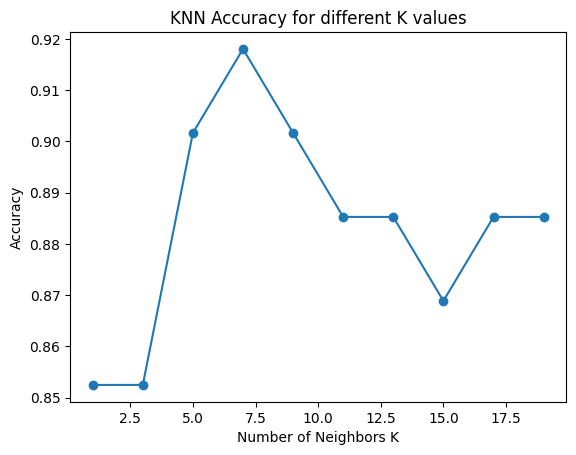

In [71]:
import matplotlib.pyplot as plt

accuracies = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scale, y_train)
    y_pred_k = knn.predict(X_test_scale)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.plot(range(1, 21, 2), accuracies, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()
    

In [72]:
accuracies

[0.8524590163934426,
 0.8524590163934426,
 0.9016393442622951,
 0.9180327868852459,
 0.9016393442622951,
 0.8852459016393442,
 0.8852459016393442,
 0.8688524590163934,
 0.8852459016393442,
 0.8852459016393442]

In [73]:

best_k = range(1, 21, 2)[accuracies.index(max(accuracies))]
print(f"Best K is {best_k} with accuracy {max(accuracies):.4f}")

Best K is 7 with accuracy 0.9180


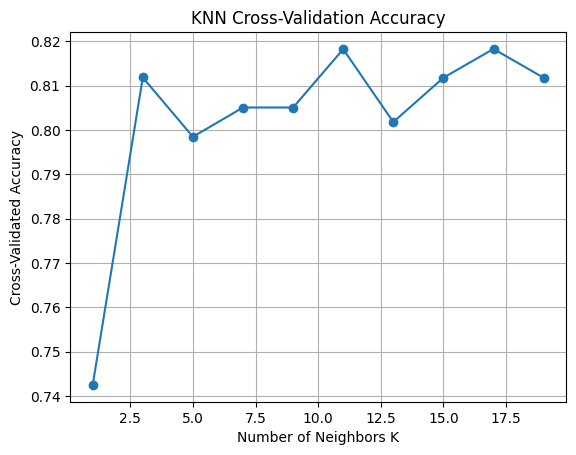

Best K from cross-validation: 17 with accuracy 0.8183


In [76]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

k_range = range(1, 21, 2)
cv_scores = []

# Setup stratified k-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop over k values
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, scaler.transform(X), y, cv=skf, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot cross-validated accuracy
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validation Accuracy')
plt.grid(True)
plt.show()

# Get best k
best_k_cv = k_range[cv_scores.index(max(cv_scores))]
print(f"Best K from cross-validation: {best_k_cv} with accuracy {max(cv_scores):.4f}")